In [332]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# MATRIX PROFILE

In [333]:
df = pd.read_csv("ts_approx.csv")
df_noapprox = pd.read_csv("ts_transformed.csv")

In [334]:
df

,id,0,1,2,3,4,5,6,7,8,...,43,44,45,46,47,48,49,rating,genre,rating_category
0,tt0062622,5,5,5,4,3,4,2,3,4,...,1,1,1,1,1,1,1,8.3,"['Adventure', 'Sci-Fi']",High
1,tt0064816,5,5,5,5,2,3,3,3,4,...,1,2,4,3,0,1,0,7.1,"['Crime', 'Drama', 'Romance']",High
2,tt0088178,5,5,5,3,3,3,5,5,5,...,2,2,2,2,2,2,2,8.7,"['Documentary', 'Music']",High
3,tt0145487,5,2,2,2,1,1,3,5,2,...,4,4,2,2,2,2,2,7.4,"['Action', 'Adventure', 'Sci-Fi']",High
4,tt0359950,5,5,5,5,5,5,5,5,4,...,1,1,1,1,1,1,1,7.3,"['Adventure', 'Comedy', 'Drama']",High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,tt9731534,5,5,5,4,4,4,4,5,5,...,1,1,1,1,1,1,1,6.4,"['Horror', 'Mystery', 'Thriller']",Medium
1130,tt9735462,5,5,5,4,5,5,4,5,5,...,1,1,1,1,1,1,1,6.3,"['Biography', 'Comedy', 'Drama']",Medium
1131,tt9764362,5,5,5,4,4,4,4,5,5,...,1,1,1,1,1,1,1,7.2,"['Comedy', 'Horror', 'Thriller']",High
1132,tt9784798,5,5,5,3,2,2,3,5,5,...,1,1,2,1,1,1,1,7.4,"['Biography', 'Drama', 'History']",High


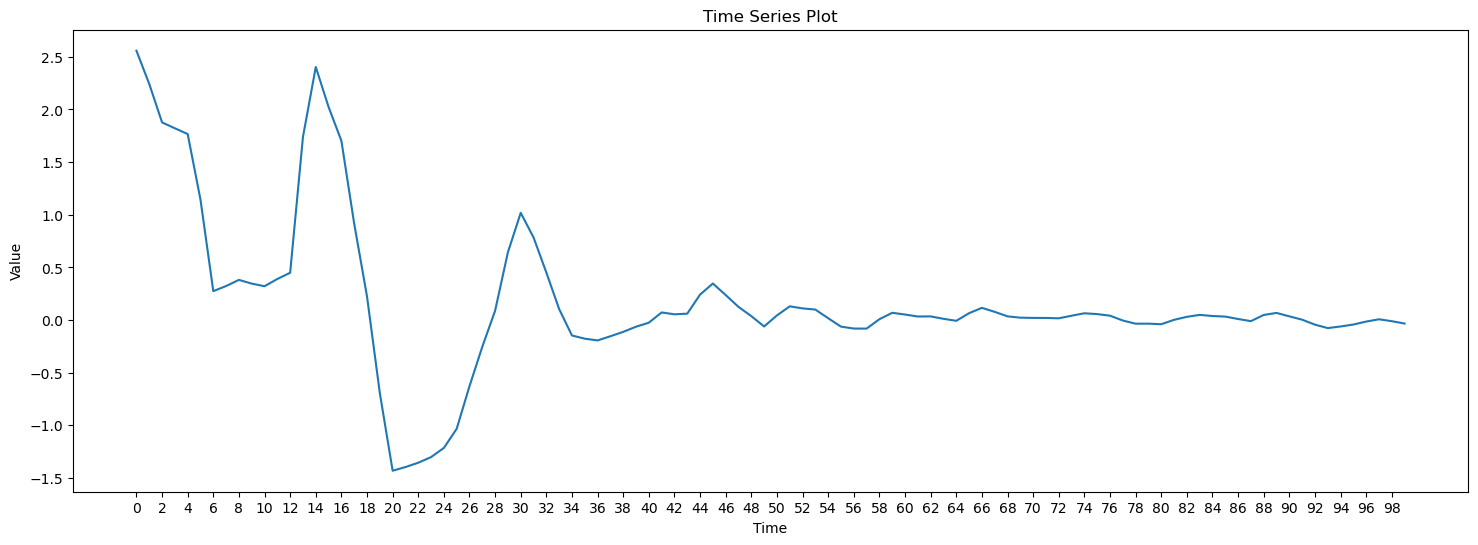

In [335]:
import pandas as pd
import pywt

# Select the first row for demonstration
row = df_noapprox.iloc[2]

# Extract the time series data (columns '0' to '15')
time_series = row[1:101].astype(float)

# Create the plot
plt.figure(figsize=(18, 6))
plt.plot(time_series)
plt.title('Time Series Plot')
plt.xticks(ticks=time_series.index[::2], labels=time_series.index[::2])
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


In [336]:
# !pip install matrixprofile-ts

In [337]:
# !pip install stumpy

In [338]:
from matrixprofile import *

In [339]:
time_series += np.random.normal(0, 1e-6, size=len(time_series))
time_series

0     2.558032
1     2.242590
2     1.877204
3     1.821367
4     1.766712
        ...   
95   -0.042400
96   -0.014291
97    0.007561
98   -0.010647
99   -0.033157
Name: 2, Length: 100, dtype: float64

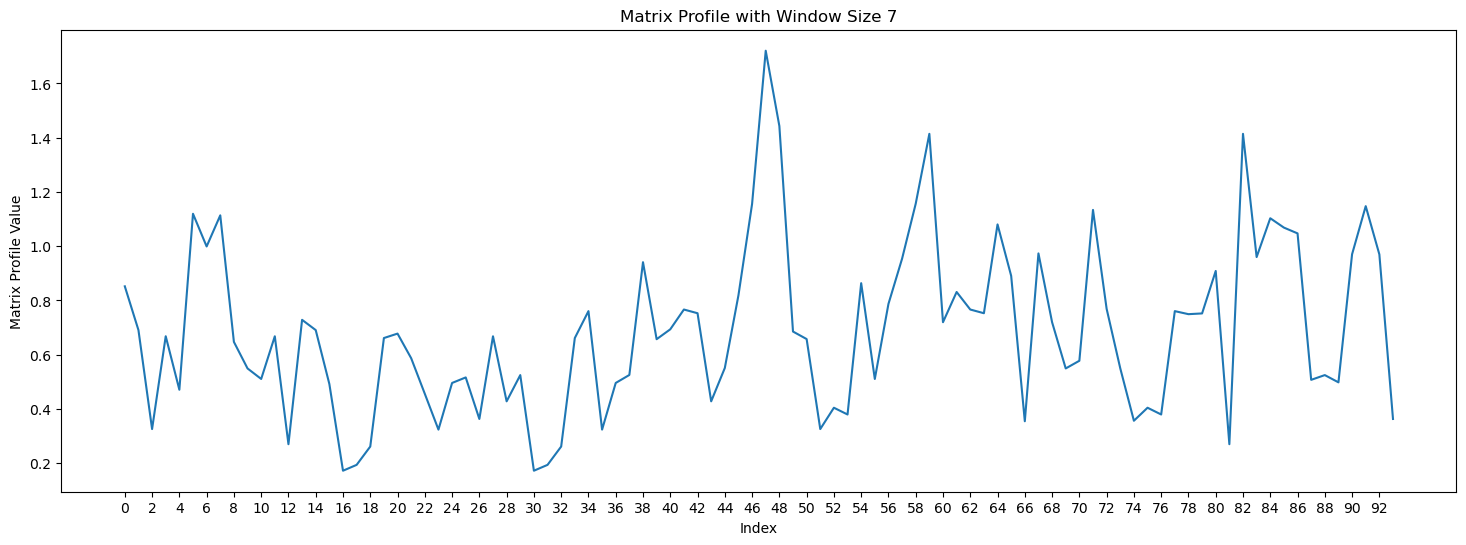

In [340]:
import matplotlib.pyplot as plt
import numpy as np
from matrixprofile import matrixProfile

# Window size
w =  7

# Compute matrix profile
mp, mpi = matrixProfile.stomp(time_series.values, w)

# Plot the matrix profile
plt.figure(figsize=(18, 6))
plt.plot(mp)
plt.xticks(np.arange(0, len(mp), 2))
plt.xlabel('Index')
plt.ylabel('Matrix Profile Value')
plt.title('Matrix Profile with Window Size 7')
plt.show()


In [341]:
mp

array([0.8520476 , 0.69069633, 0.32581678, 0.66800285, 0.47083026,
       1.11954088, 0.9990302 , 1.11376874, 0.64713286, 0.54926801,
       0.51052163, 0.66788686, 0.26995552, 0.7284981 , 0.69069633,
       0.49187607, 0.17218925, 0.19377611, 0.2613508 , 0.66136885,
       0.67774534, 0.58696939, 0.45577954, 0.32375987, 0.49578034,
       0.5161601 , 0.36301322, 0.66788686, 0.42804447, 0.5247736 ,
       0.17218925, 0.19377611, 0.2613508 , 0.66136885, 0.76061034,
       0.32375987, 0.49578034, 0.52524949, 0.94097586, 0.65710978,
       0.69355689, 0.76652717, 0.7528583 , 0.42804447, 0.55091059,
       0.81904537, 1.15585895, 1.72069715, 1.44313171, 0.68531896,
       0.65763994, 0.32581678, 0.40441632, 0.37951251, 0.8636328 ,
       0.51052163, 0.78716497, 0.95398043, 1.15673647, 1.41428936,
       0.71971004, 0.83115743, 0.76652717, 0.7528583 , 1.08032777,
       0.89056699, 0.35455832, 0.97338167, 0.71971004, 0.54926801,
       0.57758708, 1.13375521, 0.7691136 , 0.54973219, 0.35641

In [342]:
mpi

array([14., 14., 51., 17., 18., 33., 39., 20., 21., 69., 55., 27., 81.,
       50.,  1., 51., 30., 31., 32., 33., 35., 35., 35., 35., 36., 36.,
       93., 11., 43., 88., 16., 17., 18., 19., 77., 23., 24., 25., 23.,
       21.,  9., 62., 63., 28., 88., 89., 90., 54., 11., 12., 73.,  2.,
       75., 76., 77., 10., 79., 80., 87., 82., 68., 69., 41., 42., 28.,
       44., 31., 32., 60.,  9., 55., 86., 87., 29., 51., 52., 53., 34.,
       55., 26., 27., 12., 59., 60., 61., 62., 42., 43., 29., 16., 75.,
       76., 78., 26.])

# Motif Discovery

In [354]:
m = 7
motifs_list = []

for i in range(len(df_noapprox)):

    # Supponiamo che tu abbia già definito il DataFrame `df`
    row = df_noapprox.iloc[i]  # Estrai la riga 3

    # Estrai i valori numerici da colonna 1 a 100 (escludendo l'ID e altri metadati)
    time_series = row[1:101].astype(float).values
    time_series += np.random.normal(0, 1e-6, size=len(time_series))

    # Crea la serie temporale
    ts = pd.Series(time_series, index=range(len(time_series)))

    # lunghezza del sottosegmento
    mp, mpi = matrixProfile.stomp(ts.values, w)

    mo, mod = motifs.motifs(ts.values, (mp,mpi), max_motifs=5) #, radius=1

    for motif in mo:
        motif_start = int(motif[0])
        motifs_list.append({
            'row_index': i,
            'motif_index': motif_start,
            'motif': time_series[motif_start:motif_start + m]
        })

motifs_df = pd.DataFrame(motifs_list)

In [355]:
# motifs_df['motif'].loc[motifs_df['row_index'] == 3]
motifs_df

,row_index,motif_index,motif
0,0,3,"[3.6616045207913817, 3.7380183972280987, 1.922..."
1,0,13,"[-0.07993660067096263, -0.05956172126989922, 0..."
2,0,68,"[-0.29404321372334263, -0.15922967897149182, 0..."
3,1,41,"[-0.5938567213711525, -0.6859329520703517, -0...."
4,1,3,"[2.2288918733592666, 2.3828317425213457, 2.080..."
...,...,...,...
4139,1132,62,"[-0.336010484910953, -0.44253630083155215, -0...."
4140,1133,24,"[-1.5639370698400672, -1.4128627062543428, -1...."
4141,1133,19,"[0.7329550932045585, 0.21517922868446523, -0.6..."
4142,1133,3,"[2.7765043908881863, 2.0021714597176987, 0.864..."


In [356]:
motifs_counts = motifs_df.groupby('row_index').size()
motifs_counts.mean()

3.654320987654321

In [357]:
import stumpy
import pandas as pd
import matplotlib.pyplot as plt

# Supponiamo che tu abbia già definito il DataFrame `df`
row = df_noapprox.iloc[3]  # Estrai la riga 3

# Estrai i valori numerici da colonna 1 a 100 (escludendo l'ID e altri metadati)
time_series = row[1:100].astype(float).values
#time_series += np.random.normal(0, 1e-6, size=len(time_series))
# Crea la serie temporale
ts = pd.Series(time_series, index=range(len(time_series)))

m = 7  # lunghezza del sottosegmento
mp, mpi = matrixProfile.stomp(ts.values, w)

mo, mod = motifs.motifs(ts.values, (mp,mpi), max_motifs=5) #, radius=1

In [358]:
mo

[[21, 50], [42, 86], [6, 14], [28, 57, 72], [34, 78]]

C:\Users\Lavigi\AppData\Local\Temp\ipykernel_24596\1836195108.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('plasma')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


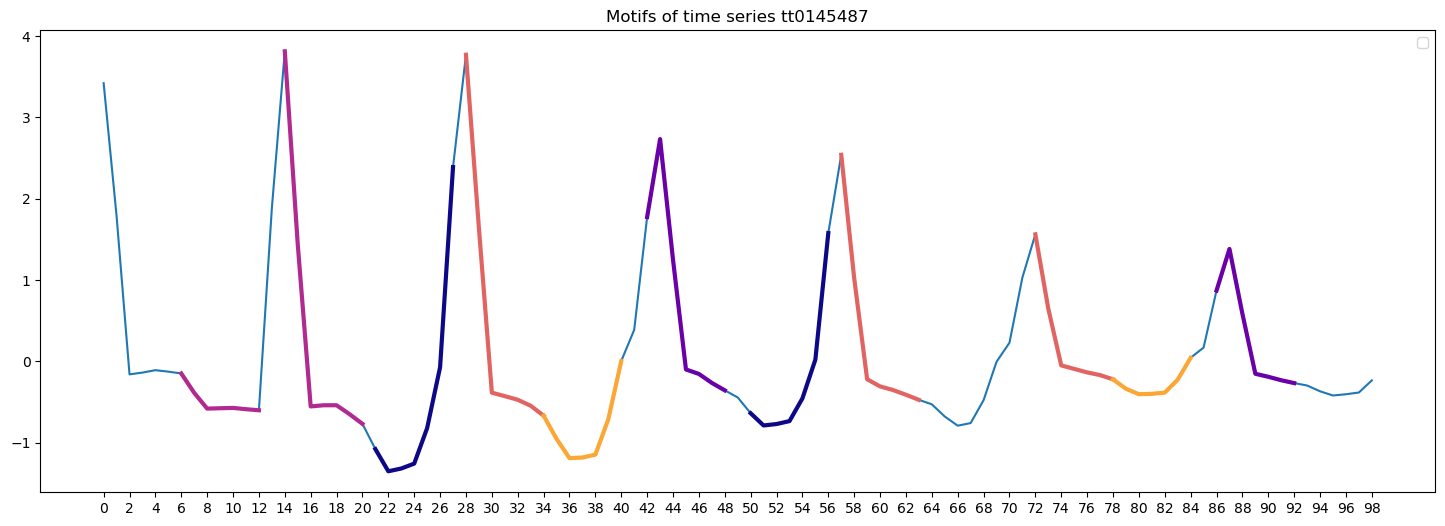

In [359]:
plt.figure(figsize=(18, 6))  # Increase figure width

plt.plot(ts.values)
import matplotlib.cm as cm
import numpy as np

cmap = cm.get_cmap('plasma')
colors = [cmap(i / len(mo)) for i in range(len(mo))]

for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

# Adjust x-axis ticks to show every 2 values
plt.xticks(range(0, len(ts), 2))

# Add title
plt.title("Motifs of time series " + str(row['id']))

# Show plot
plt.legend()
plt.show()

C:\Users\Lavigi\AppData\Local\Temp\ipykernel_24596\2496873184.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('magma')


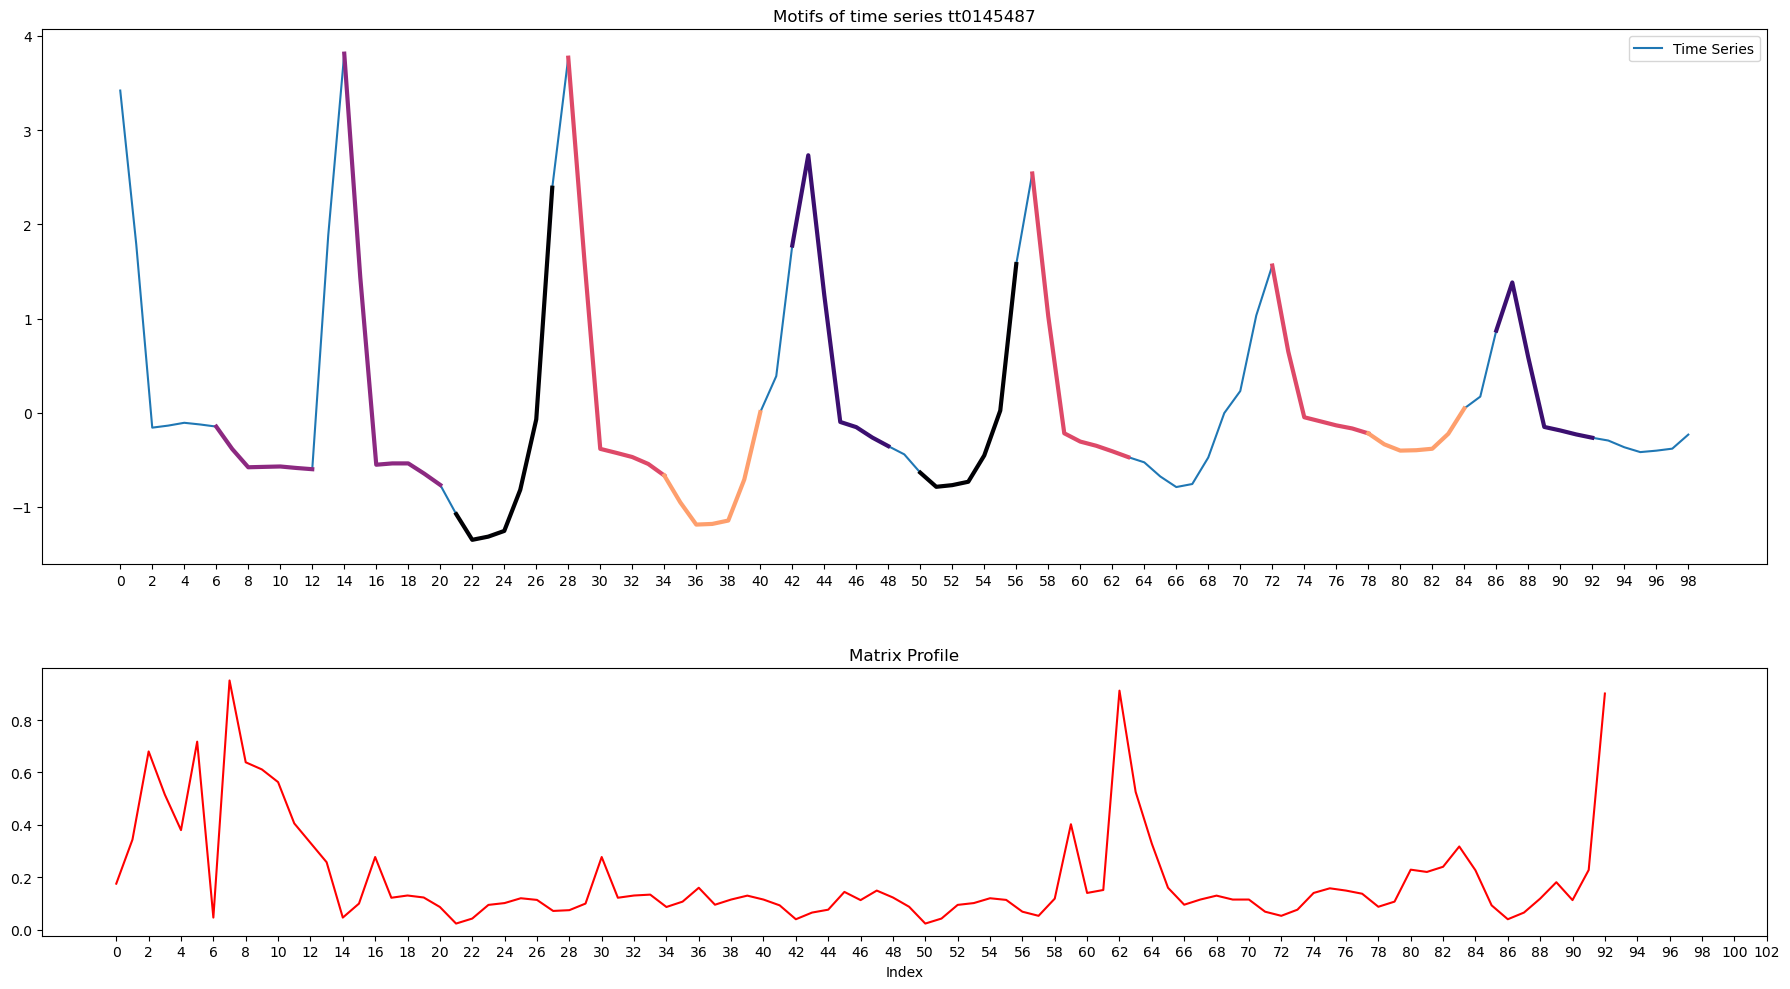

In [361]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from matrixprofile import matrixProfile

w = 7

# Crea la figura con griglia personalizzata
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(3, 1, height_ratios=[2, 0.1, 1])  # 2: spazio per motifs, 1: per matrix profile

# Primo grafico: motifs
ax1 = fig.add_subplot(gs[0])
ax1.plot(ts.values, label='Time Series')
cmap = cm.get_cmap('magma')
colors = [cmap(i / len(mo)) for i in range(len(mo))]

for m, d, c in zip(mo, mod, colors):
    for i in m:
        if i + w <= len(ts):
            m_shape = ts.values[i:i+w]
            ax1.plot(range(i, i+w), m_shape, color=c, lw=3)

ax1.set_xticks(range(0, len(ts), 2))
ax1.set_title("Motifs of time series " + str(row['id']))
ax1.legend()

# Secondo grafico: matrix profile
ax2 = fig.add_subplot(gs[2])
mp, mpi = matrixProfile.stomp(ts.values, w)

ax2.plot(mp, color='red')
ax2.set_xticks(np.arange(0, len(mp) + 10, 2))
ax2.set_xlabel('Index')
ax2.set_title('Matrix Profile')

plt.tight_layout()
plt.show()

Parameters
- max_motifs: stop finding new motifs once we have max_motifs
- radius: For each motif found, find neighbors that are within radius*motif_mp of the first.
- n_neighbors: number of neighbors from the first to find. If it is None, find all.
- ex_zone: minimum distance between indices for after each subsequence is identified. Defaults to m/2 where m is the subsequence length. If ex_zone = 0, only the found index is exclude, if ex_zone = 1 then if idx is found as a motif idx-1, idx, idx+1 are excluded.

Returns
The function returns a tuple (top_motifs, distances) which are lists of the same length.

- top_motifs: This is a list of the indices found for each motif. The first index is the nth motif followed by all nearest neighbors found sorted by distances.
- distances: Minimum Matrix profile value for each motif set.

# Anomaly Discovery

In [362]:
from matrixprofile.discords import discords

Parameters  
- mp: matrix profile numpy array
- k: the number of discords to discover
- ex_zone: the number of samples to exclude and set to Inf on either side of a found discord    

Returns 
 - a list of indexes represent the discord starting locations. MaxInt indicates there were no more discords that could be found due to too many exclusions or profile being too small. Discord start indices are sorted by highest matrix profile value.

In [376]:
m = 7
anoms_list = []

for i in range(len(df_noapprox)):

    # Supponiamo che tu abbia già definito il DataFrame `df`
    row = df_noapprox.iloc[i]  # Estrai la riga 3

    # Estrai i valori numerici da colonna 1 a 100 (escludendo l'ID e altri metadati)
    time_series = row[1:101].astype(float).values

    # Crea la serie temporale
    ts = pd.Series(time_series, index=range(len(time_series)))

    # lunghezza del sottosegmento
    mp, mpi = matrixProfile.stomp(ts.values, w)

    anoms = discords(mp, ex_zone=3, k=3)
    
    for a in anoms:
        anoms_start = int(a)
        anoms_list.append({
            'row_index': i,
            'anoms_index': anoms_start,
            'anoms': time_series[anoms_start:anoms_start + m]
        })

anoms_df = pd.DataFrame(anoms_list)
anoms_df

,row_index,anoms_index,anoms
0,0,63,"[0.1143083136232641, -0.4273063845497067, -0.1..."
1,0,67,"[-0.0583055310234651, -0.2940437713814662, -0...."
2,0,36,"[-1.1740199965073714, -0.9322277205372952, -0...."
3,1,60,"[1.8260525297011072, 0.7484595443902263, -0.09..."
4,1,80,"[-1.133371730358281, -0.9449008610983006, -0.8..."
...,...,...,...
3397,1132,80,"[-0.5173056885339187, -0.5202492897281658, -0...."
3398,1132,92,"[-0.5344861909880835, -0.5890852453975053, -0...."
3399,1133,7,"[0.3633881316859039, 0.5700029157384878, 0.403..."
3400,1133,36,"[0.1091873732940497, 0.0492549442846919, -0.00..."


In [377]:
import pandas as pd

# Calcola il numero di volte che ciascun valore di 'row_index' si ripete
row_index_counts = anoms_df['row_index'].value_counts()

# Calcola la media delle frequenze
mean_frequency = row_index_counts.mean()

print(f"La media del numero di volte che ciascun 'row_index' si ripete è: {mean_frequency}")

La media del numero di volte che ciascun 'row_index' si ripete è: 3.0


In [378]:
import stumpy
import pandas as pd
import matplotlib.pyplot as plt

# Supponiamo che tu abbia già definito il DataFrame `df`
row = df_noapprox.iloc[3]  # Estrai la riga 3

# Estrai i valori numerici da colonna 1 a 100 (escludendo l'ID e altri metadati)
time_series = row[1:101].astype(float).values

# Crea la serie temporale
ts = pd.Series(time_series, index=range(len(time_series)))

m = 7  # lunghezza del sottosegmento
mp, mpi = matrixProfile.stomp(ts.values, w)

anoms = discords(mp, ex_zone=3, k=3)

C:\Users\Lavigi\AppData\Local\Temp\ipykernel_24596\740195061.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('magma')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


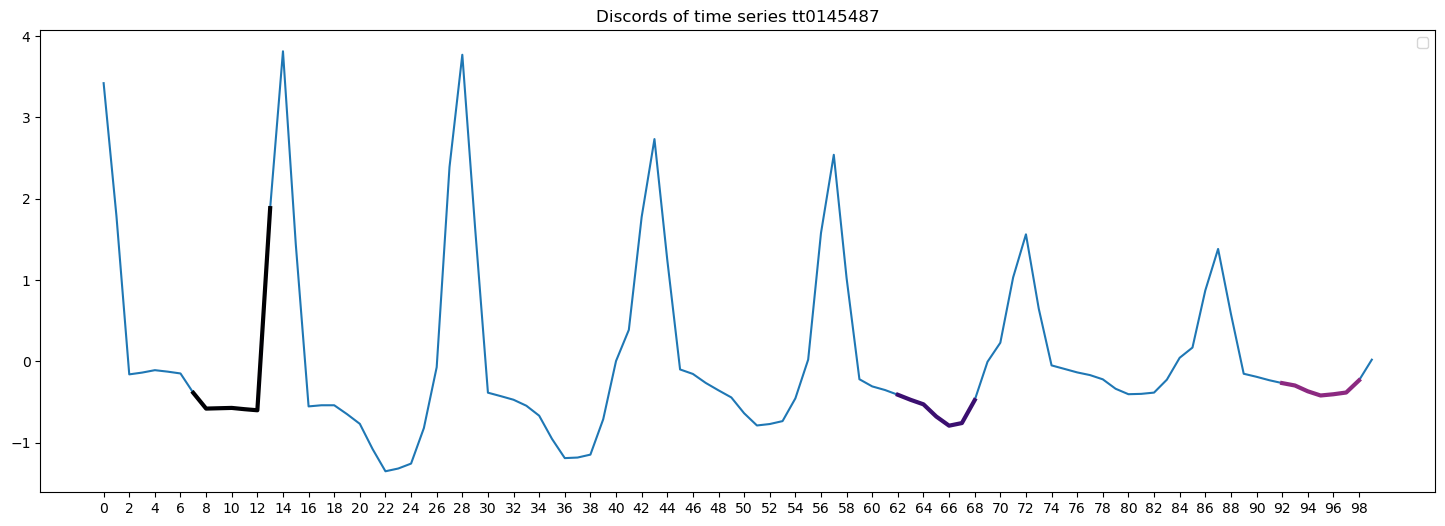

In [379]:
plt.figure(figsize=(18, 6))  # Increase figure width

plt.plot(ts.values)
import matplotlib.cm as cm
import numpy as np

cmap = cm.get_cmap('magma')
colors = [cmap(i / len(mo)) for i in range(len(mo))]

for a, c in zip(anoms, colors):
    a_shape = ts.values[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

# Adjust x-axis ticks to show every 2 values
plt.xticks(range(0, len(ts), 2))

# Add title
plt.title("Discords of time series " + str(row['id']))

# Show plot
plt.legend()
plt.show()